## Observations and Insights

## Dependencies and starter code

In [ ]:

#Observations:
#There appears to be a direct correlation between the size of the mouse and it's tumor size.
#The drug Capomulin appeared to decrease tumor size approximately 25% in under 50 days.
#The drugs Capomulin and Ramicane appeared to decrease tumor size more effectively than the other drug regimens.

In [158]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"


# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)
#print(study_results)
#print(mouse_metadata)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [159]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Extract mean, median, var, stdev, and SEM from Tumor Volume using numpy and scipy tools
summary_stats = combined_data.groupby("Drug Regimen").agg(
    tumor_mean=("Tumor Volume (mm3)", np.mean),
    tumor_median=("Tumor Volume (mm3)", np.median),
    tumor_variance=("Tumor Volume (mm3)", np.var),
    tumor_stdev=("Tumor Volume (mm3)", np.std),
    tumor_SEM=("Tumor Volume (mm3)", st.sem)
    ).round(4)
summary_stats

/Users/esaayamini/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/esaayamini/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/esaayamini/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,tumor_mean,tumor_median,tumor_variance,tumor_stdev,tumor_SEM
Drug Regimen,,,,,
Capomulin,40.6757,41.5578,24.9478,4.9948,0.3293
Ceftamin,52.5912,51.7762,39.2902,6.2682,0.4698
Infubinol,52.8848,51.8206,43.1287,6.5672,0.4922
Ketapril,55.2356,53.6987,68.5536,8.2797,0.6039
Naftisol,54.3316,52.5093,66.1735,8.1347,0.5965
Placebo,54.0336,52.2889,61.1681,7.8210,0.5813
Propriva,52.3226,50.8546,42.3511,6.5078,0.5129
Ramicane,40.2167,40.6732,23.4867,4.8463,0.3210
Stelasyn,54.2331,52.4317,59.4506,7.7104,0.5731


## Bar plots

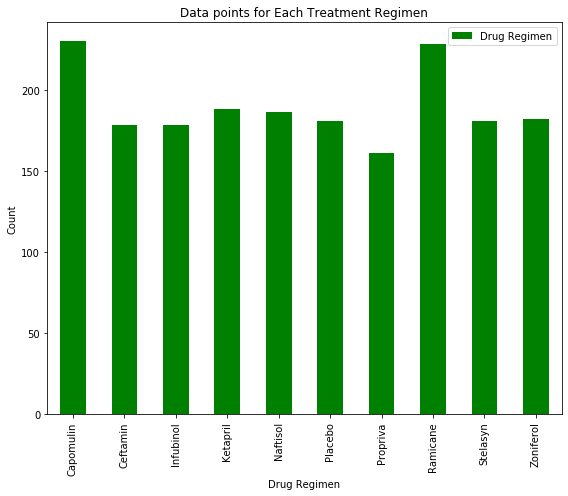

In [160]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

#sort by Drug Regimen
drug = combined_data.groupby('Drug Regimen')
#create data frame to count data points
data_points = pd.DataFrame(drug['Drug Regimen'].count())

#create bar plot
bar_plot = data_points.plot(kind='bar', title="Data points for Each Treatment Regimen", color="green")

#assigne x, y axis
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Count")
plt.tight_layout()

plt.show()

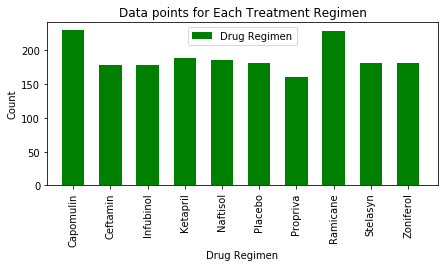

In [161]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
# Assign x axis
x_axis = np.arange(len(data_points))
ticks = [value for value in x_axis]

# configure chart size, color, and ticks
plt.figure(figsize=(7,3))
plt.bar(x_axis, data_points["Drug Regimen"], color='green', align="center", width = 0.6)
plt.xticks(ticks, list(data_points.index), rotation="vertical")

# set space between data and chart boundaries
plt.xlim(-0.7, len(x_axis)-0.2)
plt.ylim(0, max(data_points["Drug Regimen"])*1.05)

# name table and axis
plt.title("Data points for Each Treatment Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

# name colums and place legend in best location
column_name = ["Drug Regimen"]
plt.legend(column_name,loc="best")

plt.show()

## Pie plots

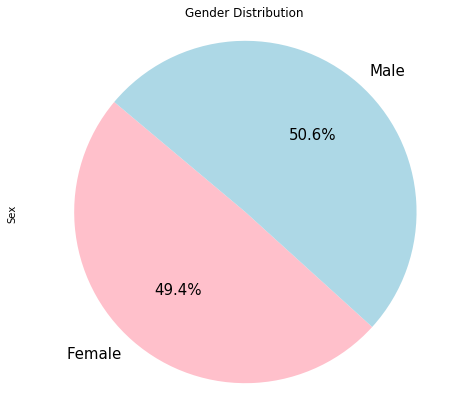

In [162]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# groupby gender
gender = combined_data.groupby('Sex')

# create data frame to hold genders
genders = pd.DataFrame(gender['Sex'].count())
genders.head()

# create pie plot
genders.plot(kind='pie', y='Sex',
             title="Gender Distribution",startangle=140,
             autopct='%1.1f%%',shadow=False, fontsize=15, colors =["pink","lightblue"],legend =False)

# create a proportionally round pie chart
plt.axis("equal")
plt.show()

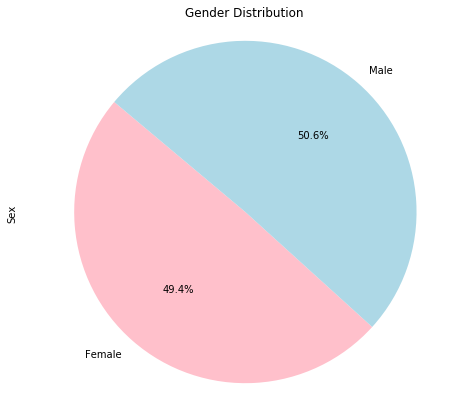

In [163]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_py = list(genders.index.values)

counts_py = genders["Sex"]

colors = ["pink", "lightblue"]

plt.pie(counts_py, labels=gender_py, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=140)

plt.rcParams['font.size'] = 10
plt.title("Gender Distribution")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()

## Quartiles, outliers and boxplots

In [164]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

# create a list of drugs
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# slice dataset
drug_lists = combined_data[combined_data["Drug Regimen"].isin(drug_list)]

# View the newly created subset dataframe
drug_lists.head(50)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [165]:
# groupby drug regimen and determine effectiveness through latest tumor volume
effectiveness = drug_lists.groupby(["Drug Regimen","Mouse ID"]).agg(
    tumor_vol=("Tumor Volume (mm3)",lambda x: x.iloc[-1])).round(4)

effectiveness

tumor_vol
Drug Regimen Mouse ID           
Capomulin    b128        38.9829
             b742        38.9396
             f966        30.4860
             g288        37.0740
             g316        40.1592
...                          ...
Ramicane     s508        30.2762
             u196        40.6677
             w678        43.1664
             y449        44.1835
             z578        30.6387

[100 rows x 1 columns]

In [166]:
#reorganize data for obtaining quartile calculations
effectiveness_unstack = effectiveness.stack(level=0).unstack(level=0)
# View the result to confirm transpose
effectiveness_unstack.head()

,Drug Regimen,Capomulin,Ceftamin,Infubinol,Ramicane
Mouse ID,,,,,
a203,tumor_vol,NaN,NaN,67.9734,NaN
a251,tumor_vol,NaN,NaN,65.5257,NaN
a275,tumor_vol,NaN,62.9994,NaN,NaN
a411,tumor_vol,NaN,NaN,NaN,38.4076
a444,tumor_vol,NaN,NaN,NaN,43.0475


In [167]:


counter = 0

# Do quartile calculations for each drug
for drug in drug_list:
    quartiles = effectiveness_unstack[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower = round(lowerq - (1.5*iqr),2)
    upper = round(upperq + (1.5*iqr),2)
    
    # Print results
    if counter == 0:
        print(f"------------------------------------------------------------------")
    print(f"{drug}'s IQR breakdown:")
    print(f"Lower quartile of {drug} is: {lowerq}")
    print(f"Upper quartile of {drug} is: {upperq}")
    print(f"Interquartile range of {drug} is: {iqr}")
    print(f"Median of {drug} is: {quartiles[0.5]} ")
    print(f"{lower} and below are possible outliers.")
    print(f"{upper} and above are possible outliers.")
    print(f"------------------------------------------------------------------")
    counter += 1

------------------------------------------------------------------
Capomulin's IQR breakdown:
Lower quartile of Capomulin is: 32.38
Upper quartile of Capomulin is: 40.16
Interquartile range of Capomulin is: 7.78
Median of Capomulin is: 38.13 
20.71 and below are possible outliers.
51.83 and above are possible outliers.
------------------------------------------------------------------
Ramicane's IQR breakdown:
Lower quartile of Ramicane is: 31.56
Upper quartile of Ramicane is: 40.66
Interquartile range of Ramicane is: 9.1
Median of Ramicane is: 36.56 
17.91 and below are possible outliers.
54.31 and above are possible outliers.
------------------------------------------------------------------
Infubinol's IQR breakdown:
Lower quartile of Infubinol is: 54.05
Upper quartile of Infubinol is: 65.53
Interquartile range of Infubinol is: 11.48
Median of Infubinol is: 60.17 
36.83 and below are possible outliers.
82.75 and above are possible outliers.
------------------------------------------

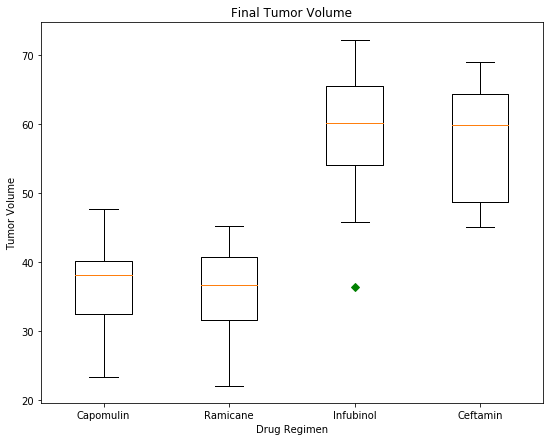

In [168]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Build list repository
boxplot = []

for drug in drug_list:
    boxplot.append(list(effectiveness_unstack[drug].dropna()))
    
#Set box plot labels and ticks
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor Volume')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Volume')
ax.boxplot(boxplot,notch=0,sym='gD')
plt.xticks([1,2,3,4],drug_list)

plt.show()

## Line and scatter plots

In [169]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capomulin = combined_data.loc[combined_data['Drug Regimen'] == 'Capomulin']

# View the dataframe
capomulin.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [170]:
time_tumor = capomulin.groupby(['Timepoint']).agg(
        tumor_mean=('Tumor Volume (mm3)', np.mean),
        tumor_SEM=('Tumor Volume (mm3)', st.sem)).round(4)


time_tumor.head()

/Users/esaayamini/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/esaayamini/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/esaayamini/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,tumor_mean,tumor_SEM
Timepoint,,
0,45.0000,0.0000
5,44.2661,0.4486
10,43.0843,0.7027
15,42.0643,0.8386
20,40.7163,0.9097


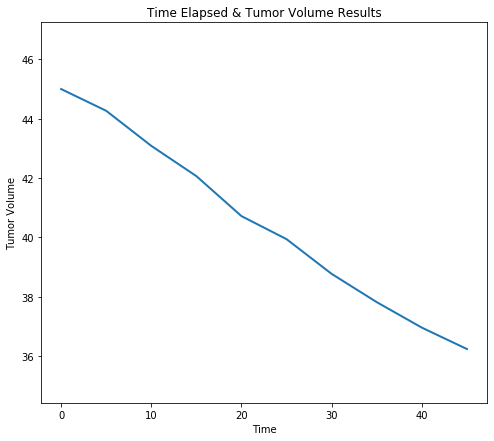

In [171]:
results = list(time_tumor.index.values)

plt.plot(
    results,
    time_tumor['tumor_mean'],     
    label="Time Point and Tumor Volume Results", 
    linewidth=2  
    )


# Set titles and labels
plt.title("Time Elapsed & Tumor Volume Results")
plt.xlabel("Time")
plt.ylabel("Tumor Volume")

# Set x, y axis and table size
plt.xlim(min(results)-max(results)*0.05, max(results)*1.05)
plt.ylim(min(time_tumor['tumor_mean'])*0.95, max(time_tumor['tumor_mean'])*1.05)
plt.rcParams["figure.figsize"] = [8,7]


plt.show()

In [172]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

mouse = capomulin.groupby(['Mouse ID']).agg(
        mouse_weight=('Weight (g)', np.mean),
        tumor_mean=('Tumor Volume (mm3)', np.mean)
).round(4)
mouse.head()

,mouse_weight,tumor_mean
Mouse ID,,
b128,22,41.9636
b742,21,40.0837
f966,17,36.5060
g288,19,41.9901
g316,22,44.6133


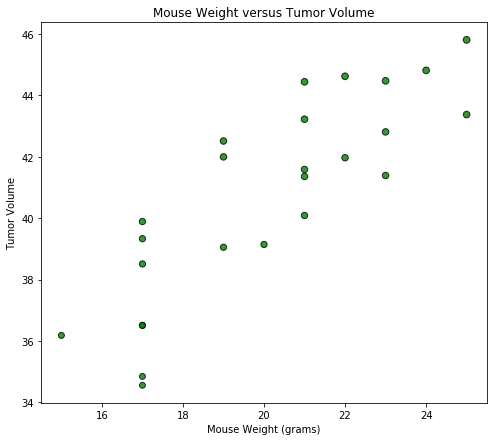

In [173]:
plt.scatter(
    mouse['mouse_weight'],
    mouse['tumor_mean'],
    marker='o',
    facecolors='green',
    edgecolors='black',
    s=mouse['tumor_mean'],
    alpha=.80)

# Give title and x,y axis names
plt.title("Mouse Weight versus Tumor Volume")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Tumor Volume")

plt.show()

In [174]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse['mouse_weight'],mouse['tumor_mean'])
print(f"The correlation between Mouse Weight and Tumor Volume is {round(correlation[0],2)}")

The correlation between Mouse Weight and Tumor Volume is 0.84


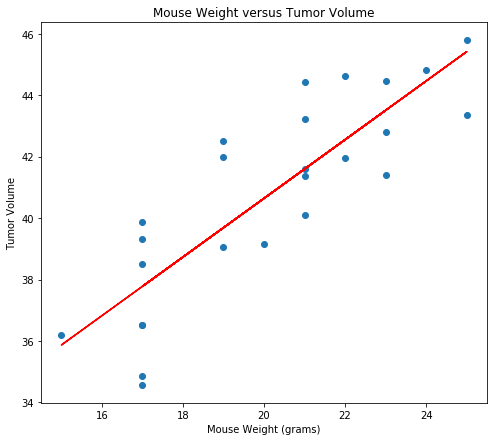

In [175]:
x_values = mouse['mouse_weight']
y_values = mouse['tumor_mean']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

#Overlap line and scatter plot
line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

#Name chart and axis
plt.title("Mouse Weight versus Tumor Volume")
plt.xlabel("Mouse Weight (grams)")
plt.ylabel("Tumor Volume")

plt.show()